# Prerequisites
conda install -c conda-forge python-igraph
conda install -c conda-forge plotly

# Content
This notebook uses tree data (structured as CSV) which is generated by Christian Koch:
* https://github.com/c4ristian/collatz/tree/v1.3.2
* https://github.com/c4ristian/collatz/blob/v1.3.2/collatz/graph.py
* https://github.com/c4ristian/collatz/blob/v1.3.2/tests/test_graph.py
* https://github.com/c4ristian/collatz/blob/v1.3.2/notebooks/dutch_graph.md

These trees are visualized using Plotly and igraph.

In [50]:
import pandas as pd
import igraph as ig

In [51]:
df = pd.read_csv("dutch_graph_t_0.csv", skip_blank_lines=True, header=0)
df.drop(df.columns[0], axis=1, inplace=True)
df['successor'] = df['successor'].astype(int)
df['predecessor'] = df['predecessor'].astype(int)

vertices = df['successor'].append(df['predecessor']).unique()
vertexMap = {}
for i, vertex in enumerate(vertices, start=0):
    vertexMap[vertex] = i
num_vertices = len(vertices)
num_edges = df.shape[0]

g = ig.Graph(directed=True)
g.add_vertices(vertices)

for i in range(num_vertices):
    g.vs[i]["id"] = i
    g.vs[i]["label"] = str(vertices[i])
    g.vs[i]["prunable"] = df.loc[(df.successor == vertices[i]), 'prunable']

for index, row in df.iterrows():
   predecessor_id = vertexMap[row['successor']]
   successor_id = vertexMap[row['predecessor']]
   g.add_edge(predecessor_id, successor_id)

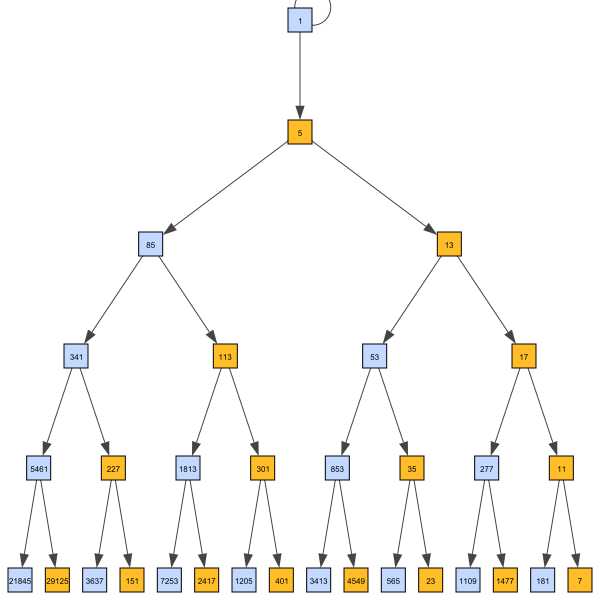

In [52]:
layout = g.layout_reingold_tilford()
color_dict = {"True": "red", "False": "#000040"}
visual_style = {}
visual_style["vertex_size"] = 24
colors = ["#c3d9ff", "#ffbe27"]#[color_dict[prunable] for prunable in g.vs["prunable"]]
visual_style["vertex_color"] = colors
visual_style["vertex_shape"] = "rectangle"
visual_style["vertex_label"] = g.vs["label"]
visual_style["vertex_label_size"] = 8
visual_style["layout"] = layout
ig.plot(g, **visual_style)

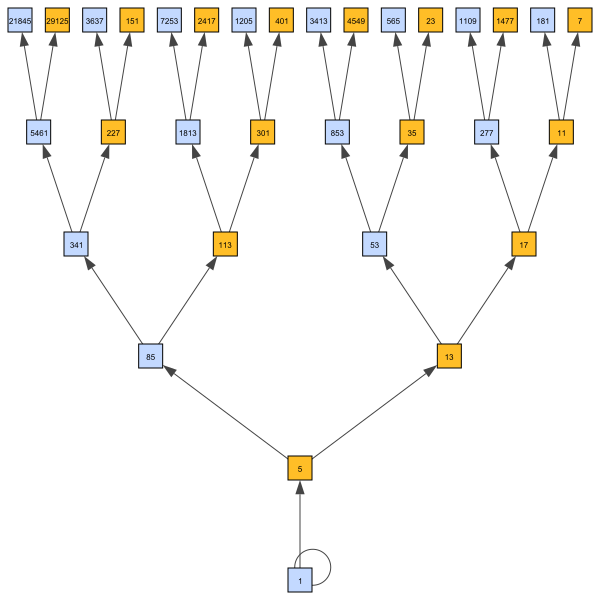

In [53]:
layout.mirror(1)
ig.plot(g, **visual_style)

In [54]:
df.head(10)

,successor,predecessor,prunable
0,1,5,False
1,1,1,True
2,5,85,False
3,5,13,True
4,85,341,False
5,85,113,True
6,13,53,False
7,13,17,True
8,341,5461,False
9,341,227,True
